In [1]:
import fm2p
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading DLC 2.3.7...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


c:\Users\dmartins\anaconda3\envs\fm1\lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
h5_path = r'K:\Mini2P\250220_DMM_DMM042_pillar\fm1\rec2_0001DLC_resnet50_freely_moving_topdown_05Feb20shuffle1_100000.h5'

In [5]:
xyl, colnames = fm2p.open_dlc_h5(h5_path)
x_vals, y_vals, likelihood = fm2p.split_xyl(xyl)

In [6]:
x_vals = fm2p.apply_liklihood_thresh(x_vals, likelihood, threshold=0.6)
y_vals = fm2p.apply_liklihood_thresh(y_vals, likelihood, threshold=0.6)

In [134]:
np.sum(~np.isnan(x_vals['head_front_x'])) / len(x_vals['head_front_x'])

0.0

In [33]:
[x for x in list(colnames) if '_x' in x]

['head_front_x',
 'head_backleft_x',
 'head_backright_x',
 'arena_TL_x',
 'arena_TR_x',
 'arena_BR_x',
 'arena_BL_x',
 'pillar_T_x',
 'pillar_B_x',
 'pillar_L_x',
 'pillar_R_x']

In [35]:
top = (np.nanmedian(x_vals['pillar_T_x']), np.nanmedian(y_vals['pillar_T_y']))
bottom = (np.nanmedian(x_vals['pillar_B_x']), np.nanmedian(y_vals['pillar_B_y']))
left = (np.nanmedian(x_vals['pillar_L_x']), np.nanmedian(y_vals['pillar_L_y']))
right = (np.nanmedian(x_vals['pillar_R_x']), np.nanmedian(y_vals['pillar_R_y']))

In [36]:
pillarX = [top[0], bottom[0], left[0], right[0]]
pillarY = [top[1], bottom[1], left[1], right[1]]
pillar_dict = fm2p.Eyecam.fit_ellipse(_, x=pillarX, y=pillarY)

In [37]:
pillar_centroid = (pillar_dict['Y0'], pillar_dict['X0'])
pillar_axes = (pillar_dict['long_axis'], pillar_dict['short_axis'])
pillar_rotation = pillar_dict['phi']
pillar_radius = np.mean(pillar_axes)

In [38]:
import matplotlib.patches as patches

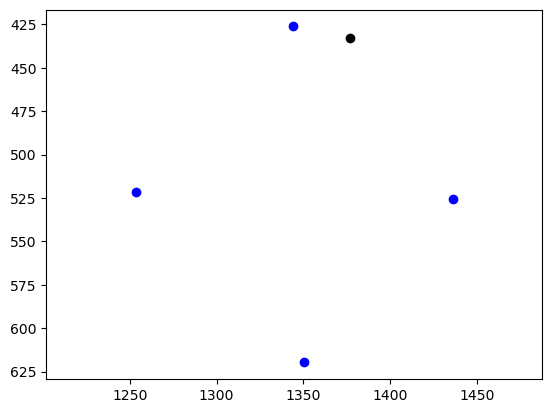

In [47]:
fig, ax = plt.subplots(1,1)
plt.axis('equal')
ax.invert_yaxis()
plt.plot(pillarX, pillarY, 'bo')
plt.plot(pillar_centroid[0], pillar_centroid[1], 'ko')
# ell = patches.Ellipse(pillar_centroid, pillar_radius, pillar_radius, angle=0, facecolor='lightblue', edgecolor='black')
# ax.add_patch(ell)

In [34]:
left = 'arena_TL_x'
right = 'arena_TR_x'
dist_pxls = np.nanmedian(x_vals[right]) - np.nanmedian(x_vals[left])

pxls2cm = dist_pxls / 22.
print(pxls2cm)

87.82079661976208


In [35]:
smooth_x = fm2p.convfilt(fm2p.nanmedfilt(x_vals['head_backleft_x'], 7)[0], box_pts=20)
smooth_y = fm2p.convfilt(fm2p.nanmedfilt(y_vals['head_backleft_y'], 7)[0], box_pts=20)
top_speed = np.sqrt(np.diff((smooth_x*60) / pxls2cm)**2 + np.diff((smooth_y*60) / pxls2cm)**2)

In [44]:
lear_x = fm2p.nanmedfilt(x_vals['head_backleft_x'], 7)[0]
lear_y = fm2p.nanmedfilt(y_vals['head_backleft_y'], 7)[0]
rear_x = fm2p.nanmedfilt(x_vals['head_backright_x'], 7)[0]
rear_y = fm2p.nanmedfilt(y_vals['head_backright_y'], 7)[0]
nose_x = fm2p.nanmedfilt(x_vals['head_front_x'], 7)[0]
nose_y = fm2p.nanmedfilt(y_vals['head_front_y'], 7)[0]

In [47]:
lear_x[1000]

445.037109375

In [51]:
vid_path = r'K:\Mini2P\250220_DMM_DMM042_pillar\fm1\rec2_0001.mp4'

In [52]:
vid = fm2p.pack_video_frames(vid_path, dwnsmpl=0.5)

Reading rec2_0001.mp4


100%|██████████| 30000/30000 [06:43<00:00, 74.34it/s]


(5000.0, 5200.0)

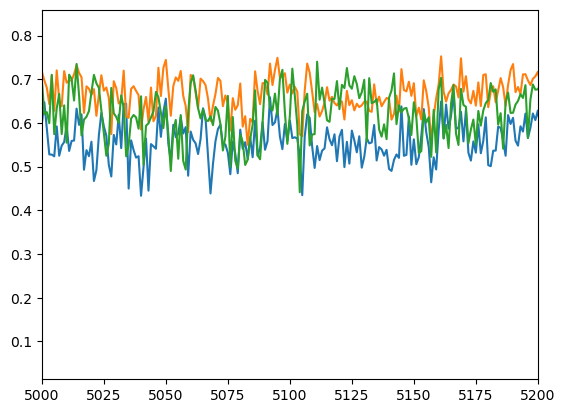

In [89]:
plt.plot(likelihood['head_front_likelihood'])
plt.plot(likelihood['head_backleft_likelihood'])
plt.plot(likelihood['head_backright_likelihood'])
plt.xlim([5000,5200])

(996.6354370117188, 796.6354370117188)

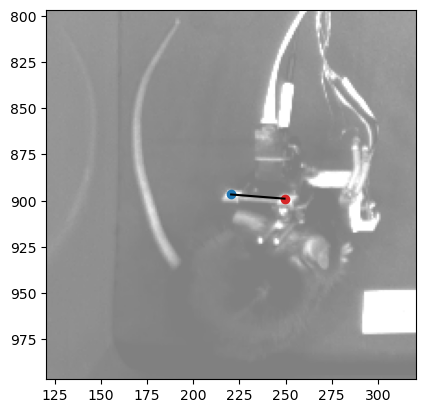

In [120]:
f = 15000
plt.imshow(vid[f,:,:], cmap='gray', alpha=0.5)
plt.plot(lear_x[f]/2, lear_y[f]/2, 'o', color='tab:blue')
plt.plot(rear_x[f]/2, rear_y[f]/2, 'o', color='tab:red')
plt.plot(nose_x[f]/2, nose_y[f]/2, 'o', color='tab:purple')
plt.plot(
    [lear_x[f]/2, rear_x[f]/2],
    [lear_y[f]/2, rear_y[f]/2],
    'k-'
)
plt.plot(
    [lear_x[f]/2, nose_x[f]/2],
    [lear_y[f]/2, nose_y[f]/2],
    'k-'
)
plt.xlim([lear_x[f]/2-100, lear_x[f]/2+100])
plt.ylim([lear_y[f]/2+100, lear_y[f]/2-100])

In [121]:
ear_len = np.sqrt((lear_x - rear_x)**2 + (lear_y - rear_y)**2)
ear_len[f]

57.954662767671685

In [130]:
np.nanpercentile(ear_len, 80)

72.21186613424801

In [127]:
np.nanmax(ear_len)

1250.9947073110463

In [101]:
nose_len = np.sqrt((lear_x - nose_x)**2 + (lear_y - nose_y)**2)
ear_len = np.sqrt((lear_x - rear_x)**2 + (lear_y - rear_y)**2)

(0.0, 300.0)

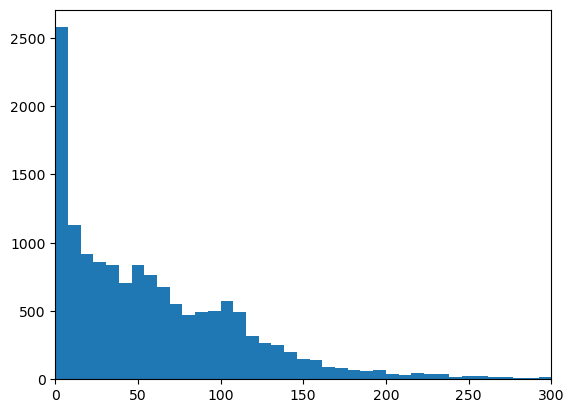

In [106]:
plt.hist(nose_len, bins=np.linspace(0,300,40))
plt.xlim([0,300])

(0.0, 300.0)

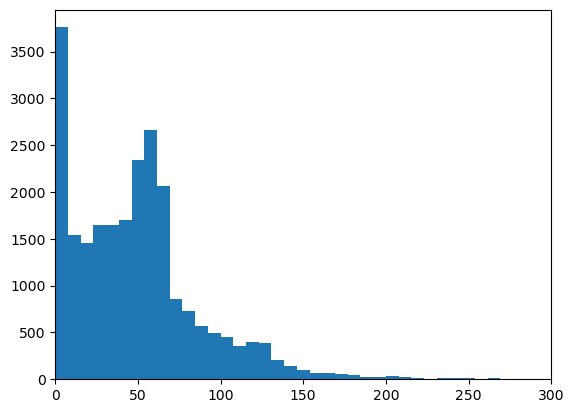

In [ ]:
plt.hist(ear_len, bins=np.linspace(0,300,40))
plt.xlim([0,300])

In [107]:
head_yaw = np.arctan2((lear_y - rear_y), (lear_x - rear_x)) + np.deg2rad(90)
head_yaw_deg = np.rad2deg(head_yaw % (2*np.pi))

(array([1253.,  954., 2477., 2314., 4658., 3976., 2610., 3087., 1530.,
        1144.]),
 array([9.04108817e-03, 3.60074456e+01, 7.20058501e+01, 1.08004255e+02,
        1.44002659e+02, 1.80001064e+02, 2.15999468e+02, 2.51997873e+02,
        2.87996277e+02, 3.23994682e+02, 3.59993086e+02]),
 <BarContainer object of 10 artists>)

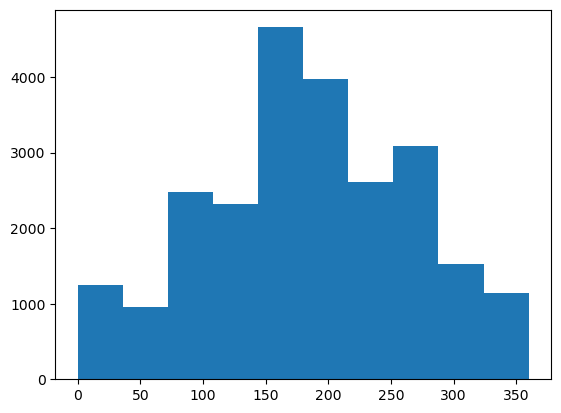

In [108]:
plt.hist(head_yaw_deg)